In [26]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        return self.value is not None

In [27]:
Entropy_List = []

In [28]:
import numpy as np

class DecisionTree:
    
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False
    
    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        print("The Current Entropy:" , entropy)
        Entropy_List.append(entropy)
        return entropy

    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh
                    # print(split['score'])

        return split['feat'], split['thresh']
    
    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)

        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)
    
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

In [29]:
data = datasets.load_breast_cancer()["data"]
print(data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [30]:
# Testing
if __name__ == "__main__":
    import numpy as np
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target
    print("The given data set is of breast cancer")
    print(data)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

The given data set is of breast cancer
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0

The Current Entropy: 0.48072292456325066
The Current Entropy: 0.9070043435513377
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.4793879389902138
The Current Entropy: 0.9035627129150936
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.4780611145286695
The Current Entropy: 0.9000204837479339
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.47674237527999647
The Current Entropy: 0.896374876243567
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.474128853429181
The Current Entropy: 0.8887619165202822
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.4854607607459134
The Current Entropy: 0.8904916402194913
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.4965010354517138
The Current Entropy: 0.8922231837828534
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.4951734787020682
The Current Entropy: 0.8882954964074687
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.5059192440727412


The Current Entropy: 0.5956581451669433
The Current Entropy: 0.8409805336163159
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.594323261706295
The Current Entropy: 0.8349869527804661
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6021633911960981
The Current Entropy: 0.8371930278506567
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6008301623137511
The Current Entropy: 0.831027306528201
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.5995032770344995
The Current Entropy: 0.8246578332945033
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.5981826920414809
The Current Entropy: 0.8180773191416908
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.5968683643520474
The Current Entropy: 0.8112781244591328
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6045279815569363
The Current Entropy: 0.8135871087327387
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6019089517362489
Th

The Current Entropy: 0.6487351534029578
The Current Entropy: 0.761587786957669
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6474532485611213
The Current Entropy: 0.7522121733341474
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.653839880626333
The Current Entropy: 0.7548464623088864
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6662578101098272
The Current Entropy: 0.7601675029619657
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6722948170756379
The Current Entropy: 0.7628544172834547
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6782208226801624
The Current Entropy: 0.765559029159814
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.676941869780886
The Current Entropy: 0.7559216247098124
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6827599533642894
The Current Entropy: 0.7586638628883695
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.6814863856763151
The 

The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7738250942126368
The Current Entropy: 0.9800844894494531
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7723306191934894
The Current Entropy: 0.9785423861930187
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7773651058755218
The Current Entropy: 0.9796494936667877
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7822962865426468
The Current Entropy: 0.9807384170438056
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7808205846863716
The Current Entropy: 0.9792000646958718
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7856580251509715
The Current Entropy: 0.9803107984107204
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7841942774499948
The Current Entropy: 0.9787355557523205
The Current Entropy: 0.9534158774525225
The Current Entropy: 0.7889406572966208
The Current Entropy: 0.9798687566511528
The Current Entropy: 0.9534158774525225


The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11373720581949189
The Current Entropy: 0.3193373865339728
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11327430349709672
The Current Entropy: 0.3227569588973982
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11281549014794888
The Current Entropy: 0.3262588146294927
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11236071009937675
The Current Entropy: 0.32984607020714635
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11190990870168403
The Current Entropy: 0.33352200393097664
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11146303230451957
The Current Entropy: 0.3372900666170139
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11102002823390325
The Current Entropy: 0.3411538931451762
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.11058084476988708
The Current Entropy: 0.345117314944953
The Current Entropy: 0.

The Current Entropy: 0.1792560669283215
The Current Entropy: 0.15649106290570153
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.1786290817822825
The Current Entropy: 0.15935006268563445
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17800689613931447
The Current Entropy: 0.1623261801753929
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17738945318599736
The Current Entropy: 0.1654270339962668
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.1767766970180548
The Current Entropy: 0.16866093149667025
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17616857262204574
The Current Entropy: 0.17203694935311378
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17556502585750278
The Current Entropy: 0.17496600343949892
The Current Entropy: 0.1792560669283215
The Current Entropy: 0.17556502585750278
The Current Entropy: 0

The Current Entropy: 0.03736947889021895
The Current Entropy: 0.05128985879995681
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.05104301664669756
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.050798721674164604
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.050556933576743124
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.05031761290692778
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.050080721052405935
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.04984622021387214
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.04961407338355302
The Current Entropy: -0.0
The Current Entropy: 0.03736947889021895
The Current Entropy: 0.04938424432441281
The Current Entropy: -0.0
The Current Entropy: 0.03

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
print("The current accuracy is:" , acc)

The current accuracy is: 0.9385964912280702


In [33]:
Iterations = [i for i in range(len(Entropy_List))]

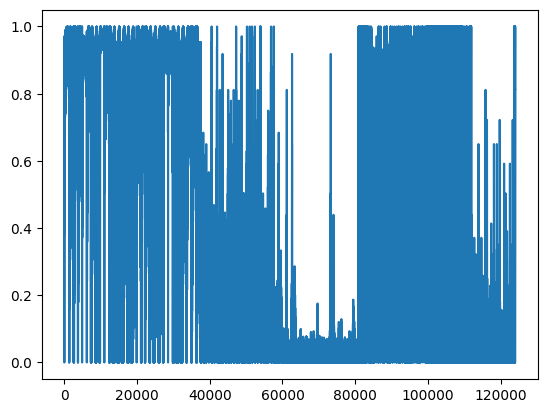

In [34]:
import matplotlib.pyplot as plt

plt.plot(Iterations, Entropy_List)